In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

hist_beg = '1985-01-01'
hist_end = '2005-12-31'

midcent_beg = '2040-01-01'
midcent_end = '2059-12-31'

endcent_beg = '2080-01-01'
endcent_end = '2099-12-31'

In [2]:
pr_ds_hist = xr.open_mfdataset('data/*pr*historical*.nc', combine='nested', concat_dim='model')
pr_ds_hist['lon'] = pr_ds_hist['lon'] - 360.0
#print(pr_ds_hist)

pr_ds_rcp45 = xr.open_mfdataset('data/*pr*rcp45*.nc', combine='nested', concat_dim='model')
pr_ds_rcp45['lon'] = pr_ds_rcp45['lon'] - 360.0
#print(pr_ds_rcp45)

pr_ds_rcp85 = xr.open_mfdataset('data/*pr*rcp85*.nc', combine='nested', concat_dim='model')
pr_ds_rcp85['lon'] = pr_ds_rcp85['lon'] - 360.0
#print(pr_ds_rcp85)


In [3]:
# Get multi-model average historical seasonal cycle in precipitation
pr_hist_mean = pr_ds_hist.sel(time=slice(hist_beg, hist_end))\
    .groupby('time.month').mean().mean(dim='model')
pr_hist_std = pr_ds_hist.sel(time=slice(hist_beg, hist_end))\
    .groupby('time.month').mean().std(dim='model')

# Get multi-model average seasonal cycle in precipitation, 2040-2060
pr_rcp45_mean_40_60 = pr_ds_rcp45.sel(time=slice(midcent_beg, midcent_end))\
    .groupby('time.month').mean().mean(dim='model')
pr_rcp45_std_40_60 = pr_ds_rcp45.sel(time=slice(midcent_beg, midcent_end))\
    .groupby('time.month').mean().std(dim='model')

# Get multi-model average seasonal cycle in precipitation, 2080-2099
pr_rcp45_mean_80_99 = pr_ds_rcp45.sel(time=slice(endcent_beg, endcent_end))\
    .groupby('time.month').mean().mean(dim='model')
pr_rcp45_std_80_99 = pr_ds_rcp45.sel(time=slice(endcent_beg, endcent_end))\
    .groupby('time.month').mean().std(dim='model')

# Get multi-model average seasonal cycle in precipitation, 2040-2060
pr_rcp85_mean_40_60 = pr_ds_rcp85.sel(time=slice(midcent_beg, midcent_end))\
    .groupby('time.month').mean().mean(dim='model')
pr_rcp85_std_40_60 = pr_ds_rcp85.sel(time=slice(midcent_beg, midcent_end))\
    .groupby('time.month').mean().std(dim='model')

# Get multi-model average seasonal cycle in precipitation, 2080-2099
pr_rcp85_mean_80_99 = pr_ds_rcp85.sel(time=slice(endcent_beg, endcent_end))\
    .groupby('time.month').mean().mean(dim='model')
pr_rcp85_std_80_99 = pr_ds_rcp85.sel(time=slice(endcent_beg, endcent_end))\
    .groupby('time.month').mean().std(dim='model')

In [4]:
# Get domain-wide seasonal cycle
seasonal_cycle_hist = pr_hist_mean.precipitation.mean(dim=('lat','lon'))
seasonal_cycle_40_60 = pr_rcp45_mean_40_60.precipitation.mean(dim=('lat','lon'))
seasonal_cycle_80_99 = pr_rcp45_mean_80_99.precipitation.mean(dim=('lat','lon'))

seasonal_cycle_hist_std = pr_hist_std.precipitation.mean(dim=('lat','lon'))
seasonal_cycle_40_60_std = pr_rcp45_std_40_60.precipitation.mean(dim=('lat','lon'))
seasonal_cycle_80_99_std = pr_rcp45_std_80_99.precipitation.mean(dim=('lat','lon'))

# Get domain-wide seasonal cycle – RCP85
seasonal_cycle_40_60_rcp85 = pr_rcp85_mean_40_60.precipitation.mean(dim=('lat','lon'))
seasonal_cycle_80_99_rcp85 = pr_rcp85_mean_80_99.precipitation.mean(dim=('lat','lon'))

seasonal_cycle_40_60_rcp85_std = pr_rcp85_std_40_60.precipitation.mean(dim=('lat','lon'))
seasonal_cycle_80_99_rcp85_std = pr_rcp85_std_80_99.precipitation.mean(dim=('lat','lon'))

seasonal_cycle_hist_np = seasonal_cycle_hist.values
seasonal_cycle_40_60_np = seasonal_cycle_40_60.values
seasonal_cycle_80_99_np = seasonal_cycle_80_99.values
seasonal_cycle_40_60_rcp85_np = seasonal_cycle_40_60_rcp85.values
seasonal_cycle_80_99_rcp85_np = seasonal_cycle_80_99_rcp85.values

seasonal_cycle_hist_std_np = seasonal_cycle_hist_std.values
seasonal_cycle_40_60_std_np = seasonal_cycle_40_60_std.values
seasonal_cycle_80_99_std_np = seasonal_cycle_80_99_std.values
seasonal_cycle_40_60_std_rcp85_np = seasonal_cycle_40_60_rcp85_std.values
seasonal_cycle_80_99_std_rcp85_np = seasonal_cycle_80_99_rcp85_std.values


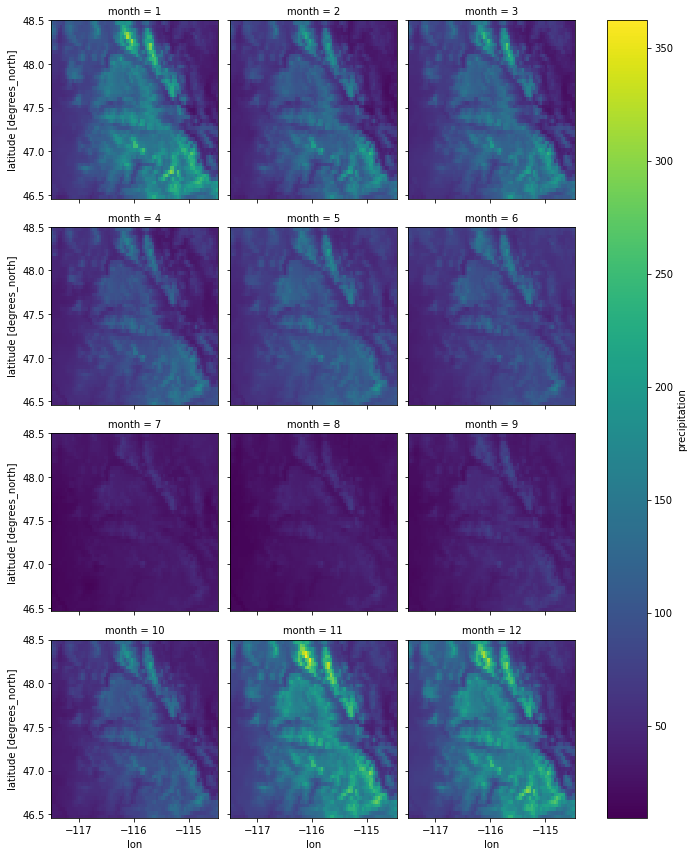

In [5]:
pr_hist_mean.precipitation.plot(col='month',col_wrap=3)

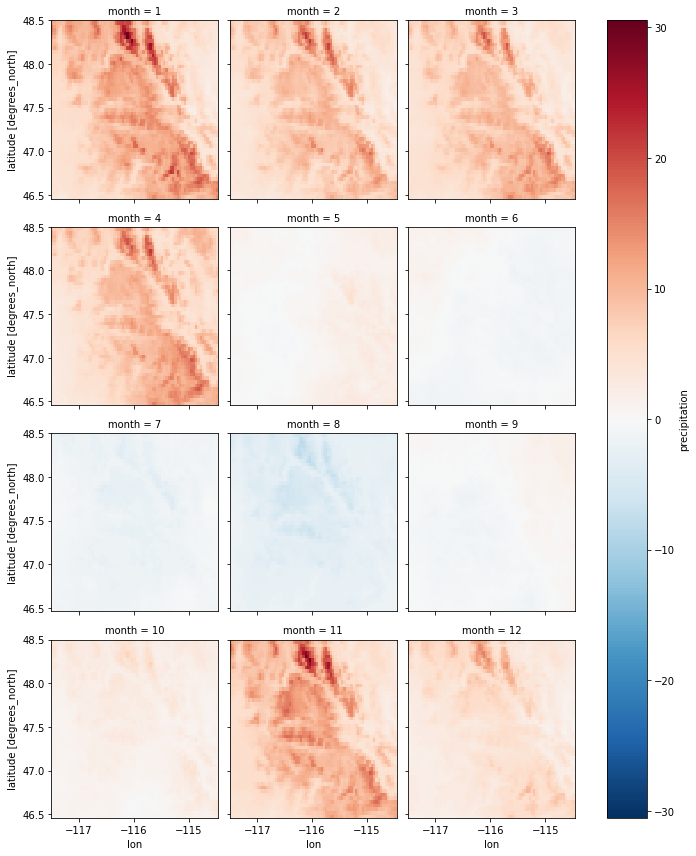

In [6]:
(pr_rcp45_mean_40_60.precipitation - pr_hist_mean.precipitation).plot(col='month',col_wrap=3)

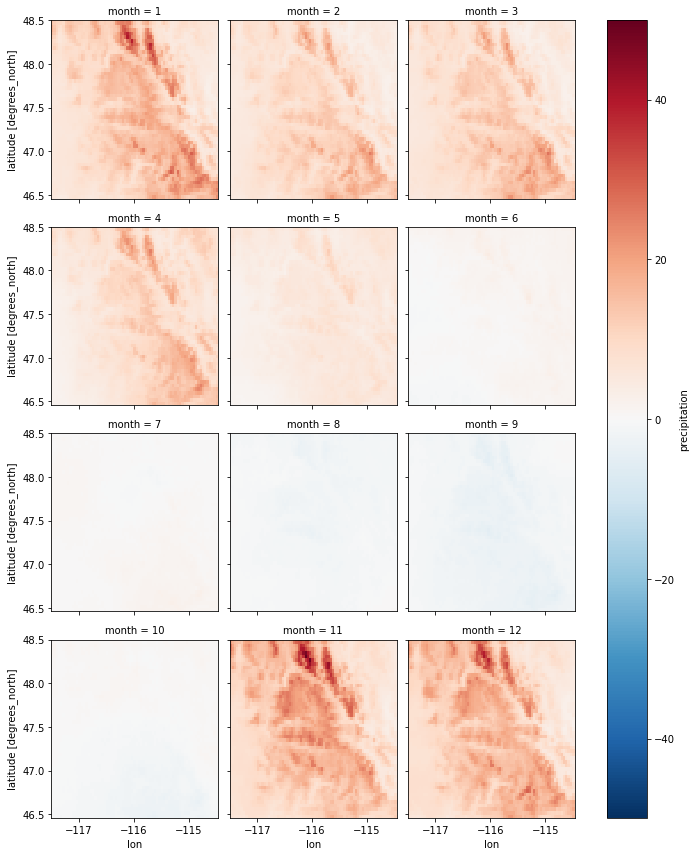

In [7]:
(pr_rcp45_mean_80_99.precipitation - pr_hist_mean.precipitation).plot(col='month',col_wrap=3)

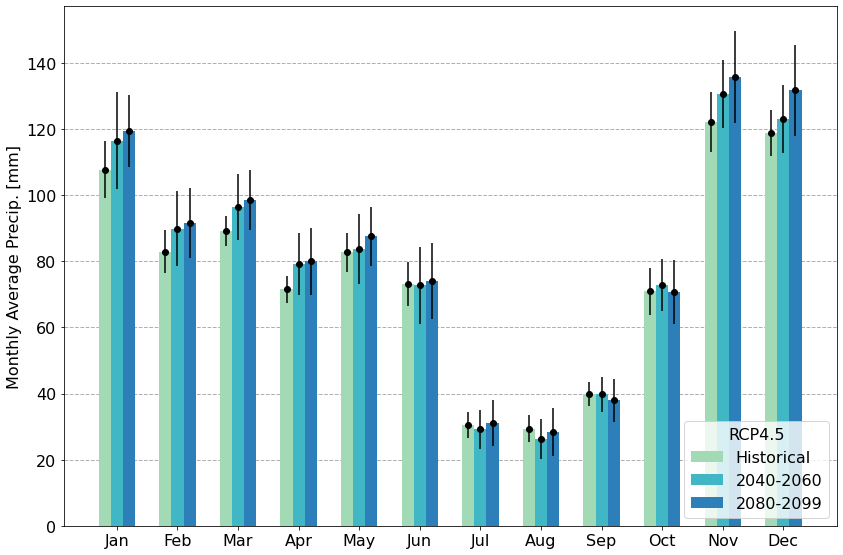

In [8]:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.rcParams.update({'font.size': 16})

x = np.arange(len(labels))+1  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width, seasonal_cycle_hist_np, width, label='Historical', color='#a1dab4', 
               zorder=2.5)
rects2 = ax.bar(x, seasonal_cycle_40_60_np, width, label='2040-2060', color='#41b6c4',
               zorder=2.5)
rects3 = ax.bar(x + width, seasonal_cycle_80_99_np, width, label='2080-2099', color='#2c7fb8',
               zorder=2.5)

ax.errorbar(x - width, seasonal_cycle_hist_np, yerr=seasonal_cycle_hist_std_np, 
                     fmt='o', color='k', zorder=3)
ax.errorbar(x, seasonal_cycle_40_60_np, yerr=seasonal_cycle_40_60_std_np,
                     fmt='o', color='k', zorder=3)
ax.errorbar(x + width, seasonal_cycle_80_99_np, yerr=seasonal_cycle_80_99_std_np, 
                     fmt='o', color='k', zorder=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.grid(axis='y', linestyle='--', linewidth=1, zorder=-10)
ax.set_ylabel('Monthly Average Precip. [mm]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(title='RCP4.5', loc='lower right')

fig.tight_layout()
plt.savefig('MACA_v2_SeasonalCyclePrecipitation_RCP45.png', bbox_inches='tight', dpi=300)
plt.show()

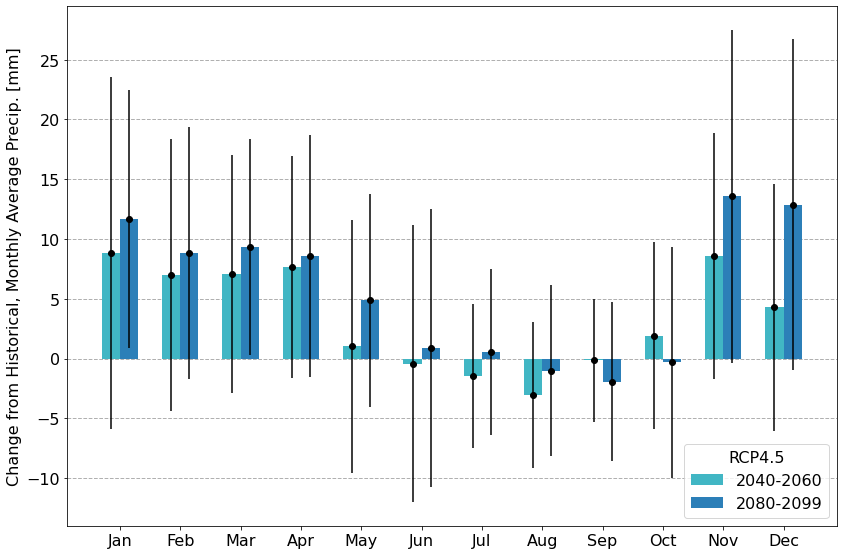

In [9]:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.rcParams.update({'font.size': 16})

x = np.arange(len(labels))+1  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width/2, seasonal_cycle_40_60_np - seasonal_cycle_hist_np, width, label='2040-2060', color='#41b6c4',
               zorder=2.5)
rects2 = ax.bar(x + width/2, seasonal_cycle_80_99_np - seasonal_cycle_hist_np, width, label='2080-2099', color='#2c7fb8',
               zorder=2.5)

ax.errorbar(x - width/2, seasonal_cycle_40_60_np - seasonal_cycle_hist_np, 
                    yerr=seasonal_cycle_40_60_std_np, fmt='o', color='k', zorder=3)
ax.errorbar(x + width/2, seasonal_cycle_80_99_np - seasonal_cycle_hist_np, 
                    yerr=seasonal_cycle_80_99_std_np, fmt='o', color='k', zorder=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.grid(axis='y', linestyle='--', linewidth=1, zorder=-10)
ax.set_ylabel('Change from Historical, Monthly Average Precip. [mm]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(title='RCP4.5', loc='lower right')

fig.tight_layout()
plt.savefig('MACA_v2_SeasonalCyclePrecipitation_change_RCP45.png', bbox_inches='tight', dpi=300)
plt.show()

## Plot RCP 8.5

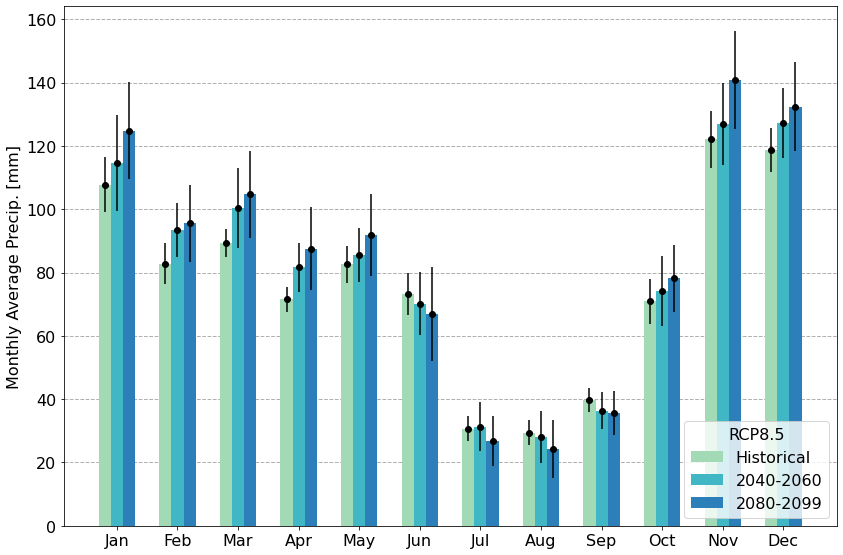

In [10]:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.rcParams.update({'font.size': 16})

x = np.arange(len(labels))+1  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width, seasonal_cycle_hist_np, width, label='Historical', color='#a1dab4', 
               zorder=2.5)
rects2 = ax.bar(x, seasonal_cycle_40_60_rcp85_np, width, label='2040-2060', color='#41b6c4',
               zorder=2.5)
rects3 = ax.bar(x + width, seasonal_cycle_80_99_rcp85_np, width, label='2080-2099', color='#2c7fb8',
               zorder=2.5)

ax.errorbar(x - width, seasonal_cycle_hist_np, yerr=seasonal_cycle_hist_std_np, 
                     fmt='o', color='k', zorder=3)
ax.errorbar(x, seasonal_cycle_40_60_rcp85_np, yerr=seasonal_cycle_40_60_std_rcp85_np,
                     fmt='o', color='k', zorder=3)
ax.errorbar(x + width, seasonal_cycle_80_99_rcp85_np, yerr=seasonal_cycle_80_99_std_rcp85_np, 
                     fmt='o', color='k', zorder=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.grid(axis='y', linestyle='--', linewidth=1, zorder=-10)
ax.set_ylabel('Monthly Average Precip. [mm]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(title='RCP8.5', loc='lower right')

fig.tight_layout()
plt.savefig('MACA_v2_SeasonalCyclePrecipitation_RCP85.png', bbox_inches='tight', dpi=300)
plt.show()

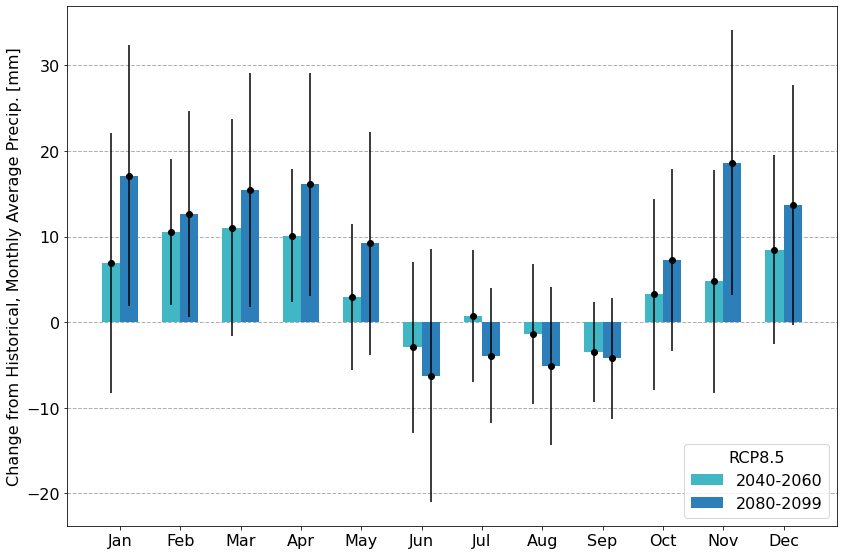

In [11]:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.rcParams.update({'font.size': 16})

x = np.arange(len(labels))+1  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width/2, seasonal_cycle_40_60_rcp85_np - seasonal_cycle_hist_np, width, label='2040-2060', color='#41b6c4',
               zorder=2.5)
rects2 = ax.bar(x + width/2, seasonal_cycle_80_99_rcp85_np - seasonal_cycle_hist_np, width, label='2080-2099', color='#2c7fb8',
               zorder=2.5)

ax.errorbar(x - width/2, seasonal_cycle_40_60_rcp85_np - seasonal_cycle_hist_np, 
                    yerr=seasonal_cycle_40_60_std_rcp85_np, fmt='o', color='k', zorder=3)
ax.errorbar(x + width/2, seasonal_cycle_80_99_rcp85_np - seasonal_cycle_hist_np, 
                    yerr=seasonal_cycle_80_99_std_rcp85_np, fmt='o', color='k', zorder=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.grid(axis='y', linestyle='--', linewidth=1, zorder=-10)
ax.set_ylabel('Change from Historical, Monthly Average Precip. [mm]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(title='RCP8.5',loc='lower right')

fig.tight_layout()
plt.savefig('MACA_v2_SeasonalCyclePrecipitation_change_RCP85.png', bbox_inches='tight', dpi=300)
plt.show()

## Seasonal Cycle – All Scenarios

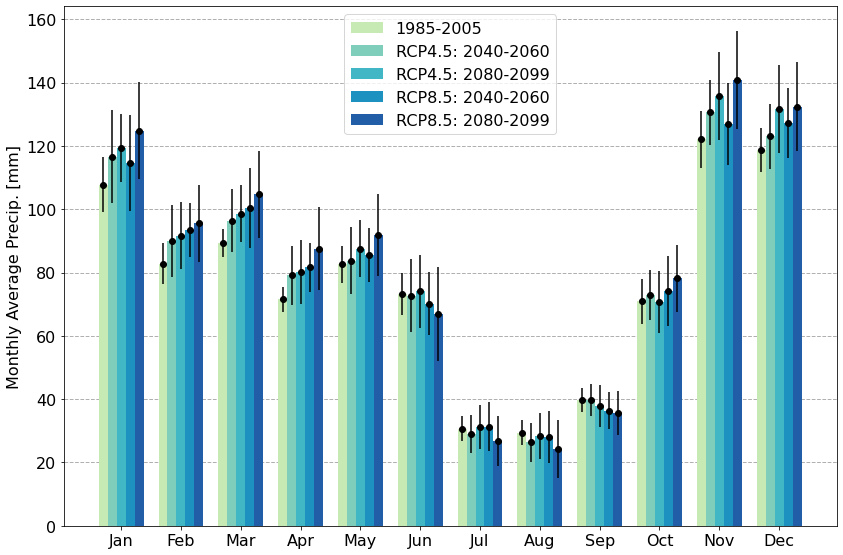

In [12]:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.rcParams.update({'font.size': 16})

x = np.arange(len(labels))+1  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - 2*width, seasonal_cycle_hist_np, width, label='1985-2005', color='#c7e9b4', 
               zorder=2.5)
rects2 = ax.bar(x - width, seasonal_cycle_40_60_np, width, label='RCP4.5: 2040-2060', color='#7fcdbb',
               zorder=2.5)
rects3 = ax.bar(x, seasonal_cycle_80_99_np, width, label='RCP4.5: 2080-2099', color='#41b6c4',
               zorder=2.5)
rects4 = ax.bar(x + width, seasonal_cycle_40_60_rcp85_np, width, label='RCP8.5: 2040-2060', color='#1d91c0',
               zorder=2.5)
rects5 = ax.bar(x + 2*width, seasonal_cycle_80_99_rcp85_np, width, label='RCP8.5: 2080-2099', color='#225ea8',
               zorder=2.5)

ax.errorbar(x - 2*width, seasonal_cycle_hist_np, yerr=seasonal_cycle_hist_std_np, 
                     fmt='o', color='k', zorder=3)
ax.errorbar(x - width, seasonal_cycle_40_60_np, yerr=seasonal_cycle_40_60_std_np,
                     fmt='o', color='k', zorder=3)
ax.errorbar(x, seasonal_cycle_80_99_np, yerr=seasonal_cycle_80_99_std_np, 
                     fmt='o', color='k', zorder=3)
ax.errorbar(x + width, seasonal_cycle_40_60_rcp85_np, yerr=seasonal_cycle_40_60_std_rcp85_np,
                     fmt='o', color='k', zorder=3)
ax.errorbar(x + 2*width, seasonal_cycle_80_99_rcp85_np, yerr=seasonal_cycle_80_99_std_rcp85_np, 
                     fmt='o', color='k', zorder=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.grid(axis='y', linestyle='--', linewidth=1, zorder=-10)
ax.set_ylabel('Monthly Average Precip. [mm]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper center')

fig.tight_layout()
plt.savefig('MACA_v2_SeasonalCyclePrecipitation_allscenarios.png', bbox_inches='tight', dpi=300)
plt.show()

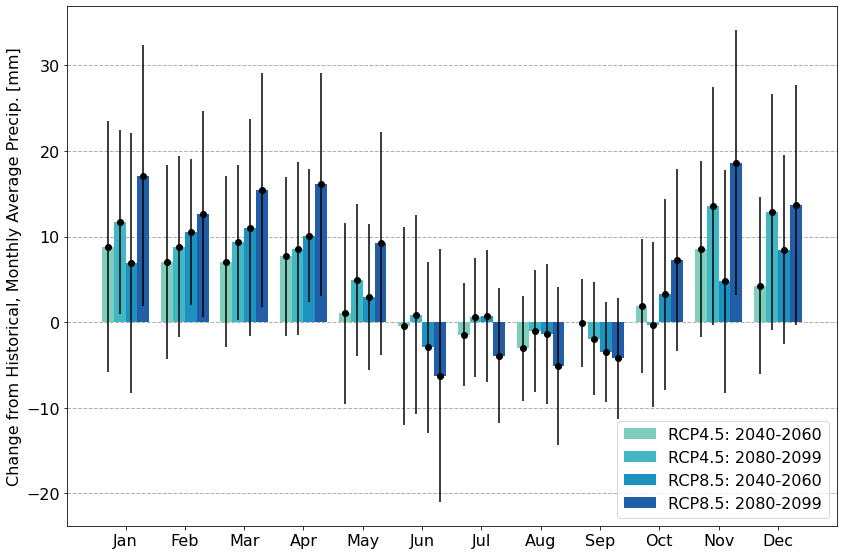

In [13]:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.rcParams.update({'font.size': 16})

x = np.arange(len(labels))+1  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - 1.5*width, seasonal_cycle_40_60_np - seasonal_cycle_hist_np, width, label='RCP4.5: 2040-2060', color='#7fcdbb',
               zorder=2.5)
rects2 = ax.bar(x - width/2, seasonal_cycle_80_99_np - seasonal_cycle_hist_np, width, label='RCP4.5: 2080-2099', color='#41b6c4',
               zorder=2.5)
rects3 = ax.bar(x + width/2, seasonal_cycle_40_60_rcp85_np - seasonal_cycle_hist_np, width, label='RCP8.5: 2040-2060', color='#1d91c0',
               zorder=2.5)
rects4 = ax.bar(x + 1.5*width, seasonal_cycle_80_99_rcp85_np - seasonal_cycle_hist_np, width, label='RCP8.5: 2080-2099', color='#225ea8',
               zorder=2.5)

ax.errorbar(x - 1.5*width, seasonal_cycle_40_60_np - seasonal_cycle_hist_np, 
                    yerr=seasonal_cycle_40_60_std_np, fmt='o', color='k', zorder=3)
ax.errorbar(x - width/2, seasonal_cycle_80_99_np - seasonal_cycle_hist_np, 
                    yerr=seasonal_cycle_80_99_std_np, fmt='o', color='k', zorder=3)
ax.errorbar(x + width/2, seasonal_cycle_40_60_rcp85_np - seasonal_cycle_hist_np, 
                    yerr=seasonal_cycle_40_60_std_rcp85_np, fmt='o', color='k', zorder=3)
ax.errorbar(x + 1.5*width, seasonal_cycle_80_99_rcp85_np - seasonal_cycle_hist_np, 
                    yerr=seasonal_cycle_80_99_std_rcp85_np, fmt='o', color='k', zorder=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.grid(axis='y', linestyle='--', linewidth=1, zorder=-10)
ax.set_ylabel('Change from Historical, Monthly Average Precip. [mm]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

fig.tight_layout()
plt.savefig('MACA_v2_SeasonalCyclePrecipitation_change_allscenarios.png', bbox_inches='tight', dpi=300)
plt.show()